# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
# !gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
# !gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
# !gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [7]:
data = pd.read_csv('./train.csv')

In [8]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [9]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4168,18,90.00,1527.35,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),1
2923,1,71.00,71,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
11,70,113.05,7869.05,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
4171,71,95.15,6770.85,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),0
3620,67,93.15,6368.2,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Two year,Yes,Electronic check,0


In [10]:
# Посчитаем Nan в каждом из столбцов: 
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [11]:
# Посмотрим на типы колонок. Числовые колонки должны иметь числовой тип данных (int, float итд), категориальные должны быть типа object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

# Заметка 1

1. Заметим что столбец TotalSpent должен быть "числового" типа, однако у него тип object, что может говорить нам о некорректной записи данных.
2. Для столбца IsSeniorCitizen dtype = int64, такое может быть для boolean типов данных, однако, стоит дополнительно проверить данную колонку.

In [12]:
# исследуем столбец TotalSpent
data["TotalSpent"].value_counts()

TotalSpent
           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: count, Length: 4978, dtype: int64

In [13]:
# Исследуем столбец IsSeniorCitizen
data["IsSeniorCitizen"].value_counts()

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

# Заметика 1 Итоги

1. Cамое часто встречаемое значение для столбца TotalSpent = ' '. Скорее всего просто не заполнено, для простоты мы установим для него
медианное значение для данного столбца. Важно заметить что медианное значение мы считаем на train выборке и его же используем при работе на тестовой. Именно таким образом достигается отсуствие data leak (утечки данных). При этом остальные числа у нас записаны в виде строк, поэтому конвертируем их во float.
2. Как и предполагалось, в столбце IsSeniorCitizen содержаться только значения 0 и 1. 

In [14]:
# Значения в столбце TotalSpent приводим к float типу, а вместо значения ' ' ставим медианное значение для данного столбца

import numpy as np 

nums = []
for num in data["TotalSpent"].to_list():
    try:
        nums.append(float(num))
    except:
        pass

# значение этой переменной будем использовать и при Test дата сете для отправки
median_total_spent = np.median(nums)

data["TotalSpent"] = data["TotalSpent"].apply(lambda x: float(x) if x!= ' ' else median_total_spent)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

# Анализ числовых признаков

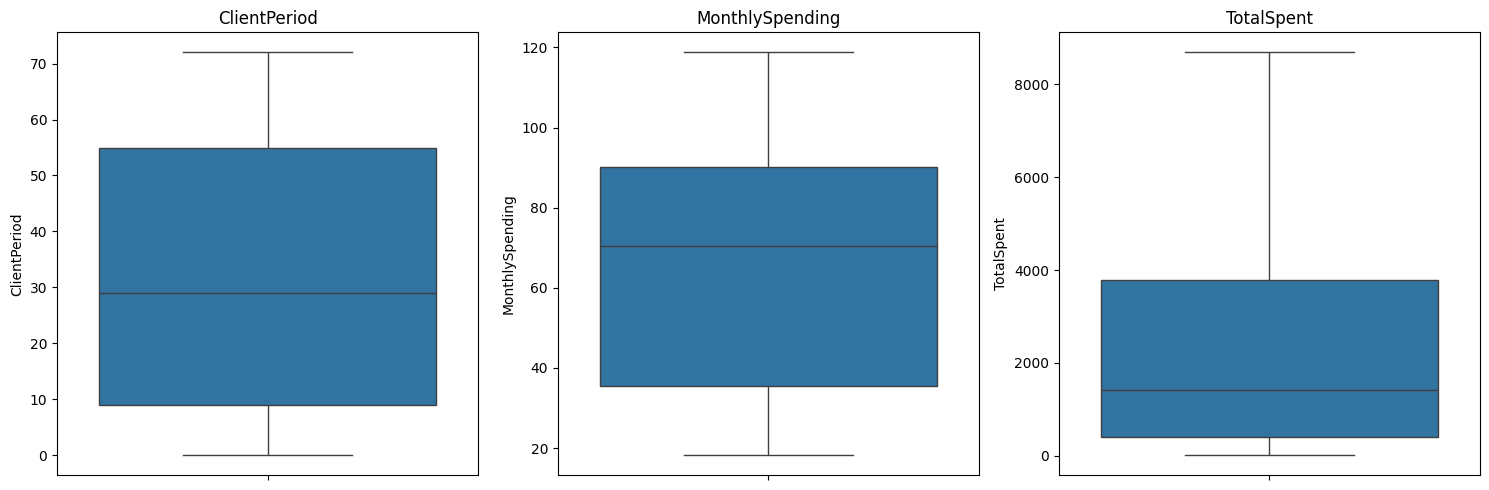

In [15]:
import seaborn as sns

# Создание фигуры для трех горизонтальных графиков
plt.figure(figsize=(15, 5))

# Первый график
plt.subplot(1, 3, 1)
sns.boxplot(data=data['ClientPeriod'])
plt.title('ClientPeriod')

# Второй график
plt.subplot(1, 3, 2)
sns.boxplot(data=data['MonthlySpending'])
plt.title('MonthlySpending')

# Третий график
plt.subplot(1, 3, 3)
sns.boxplot(data=data['TotalSpent'])
plt.title('TotalSpent')

# Отображение всех графиков
plt.tight_layout()  # Чтобы графики не перекрывали друг друга
plt.show()

# Анализ числовых фичей

Для числовых признаков заметим, что для фичи TotalSpent есть значения с довольно серьезными выбросами, поэтому посмотрим на данную фичу более подробно

<Axes: xlabel='TotalSpent', ylabel='Count'>

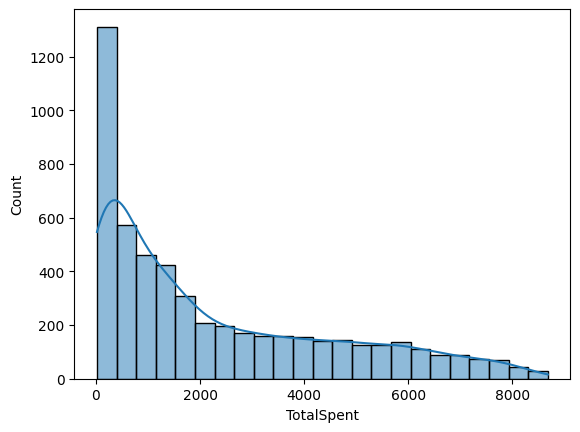

In [16]:
sns.histplot(data["TotalSpent"], kde=True)

# Фича TotalSpent
Как мы в фиче TotalSpent в самом её левом крае наблюдается сосредоточение данных, поэтому имеет смысл добавить бинарную фичу является ли значение больше/меньше какого-то порогового или нет. Ниже мы определим более точно этот порог с помощью метода pd.cut. 

In [17]:
pd.cut(data["TotalSpent"], bins=20).value_counts()

TotalSpent
(10.134, 452.1]     1415
(452.1, 885.4]       622
(885.4, 1318.7]      499
(1318.7, 1752.0]     411
(1752.0, 2185.3]     270
(2185.3, 2618.6]     231
(2618.6, 3051.9]     202
(3051.9, 3485.2]     190
(3918.5, 4351.8]     173
(3485.2, 3918.5]     170
(4785.1, 5218.4]     159
(5651.7, 6085.0]     153
(5218.4, 5651.7]     152
(4351.8, 4785.1]     149
(6085.0, 6518.3]     118
(6518.3, 6951.6]     104
(6951.6, 7384.9]      92
(7384.9, 7818.2]      80
(7818.2, 8251.5]      61
(8251.5, 8684.8]      31
Name: count, dtype: int64

In [18]:
# Добавляем новую фичу
data["Popular_spent"] = data["TotalSpent"].apply(lambda x: True if x < 453 else False)

# Работа с выбросами

Определим формально экстримально большие значение и создадим отдельный признак для таких значение. Экстримально большими будем называть 
значение которые превышают величину 99 процентиля. Так как выбросы наблюдается только в фиче TotalSpent, поэтому и определим их (выбросы) только для данной фичи.

In [19]:
import numpy as np

procentile_99 = np.percentile(data["TotalSpent"], 99)

data["Spent_99_procentile"] = data["TotalSpent"].apply(lambda x: True if x >= procentile_99 else False)

# Строим графики по категориальным фичам

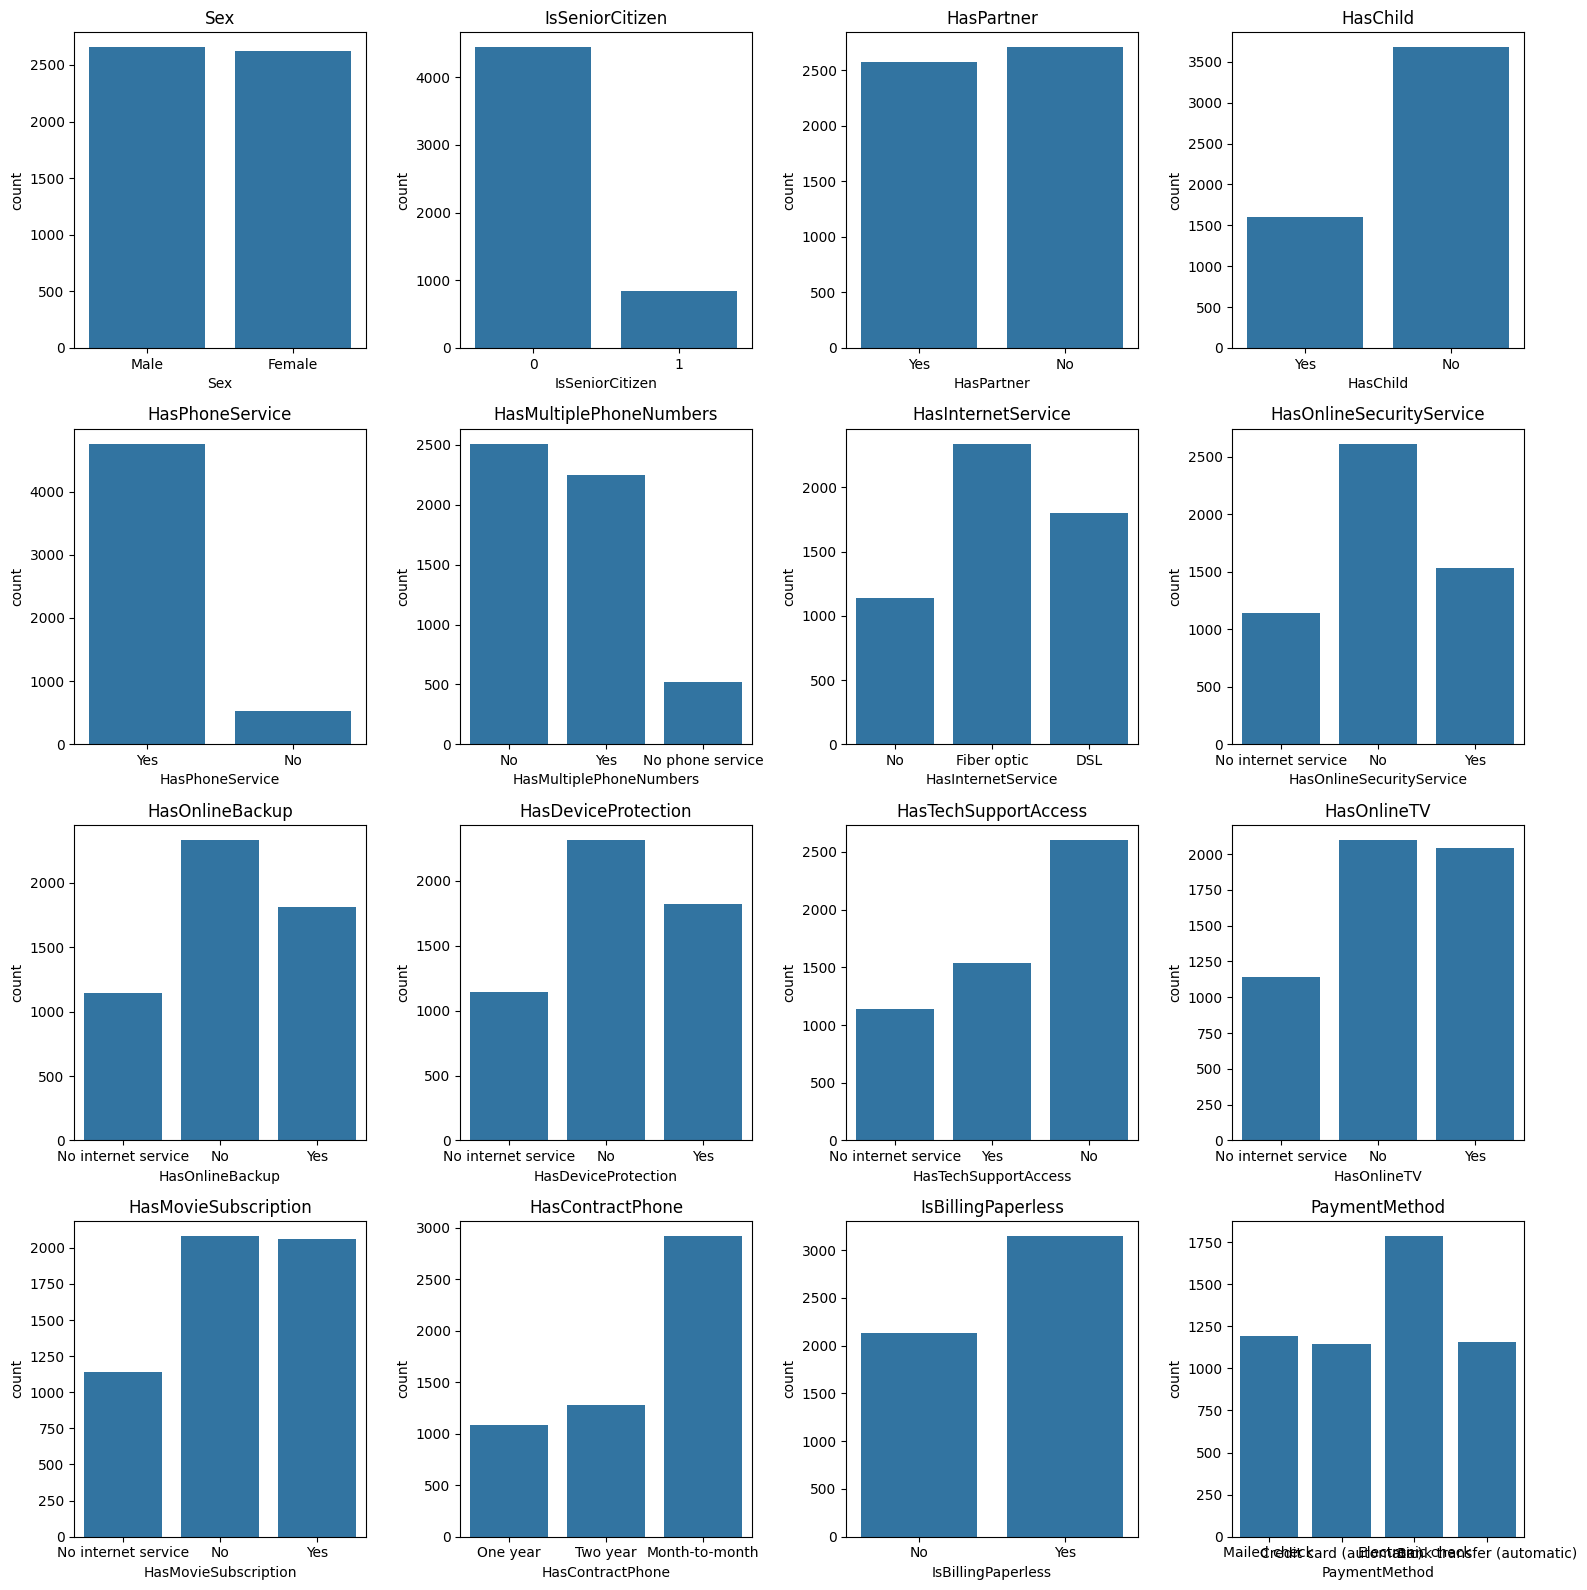

In [20]:
# Установка размера фигуры
plt.figure(figsize=(16, 16))

# Создаем сетку 4x4 и строим countplot для каждого столбца
for i, column in enumerate(data[cat_cols].columns, 1):
    plt.subplot(4, 4, i)  # Сетка 4x4
    sns.countplot(x=column, data=data)
    plt.title(f'{column}')

# Отображение графиков
plt.tight_layout()
plt.show()

# Вывод по категориальным фичам

Большинство категориальных фичей достаточно хорошо сбалансированы и какого-то сильного перекоса не наблюдается за исключением: IsSeniorCitizen, HasPhoneService. Для таких фичей нужно отдельно посмотреть корреляцию с таргетом, так как они могут либо давать сильную корреляцию и тогда по факту они будут вносить сильный вклад в итоговый таргет, либо наоборот, только зашумлять данные и тогда от такой фичи лучше избавиться

<Axes: xlabel='Churn', ylabel='count'>

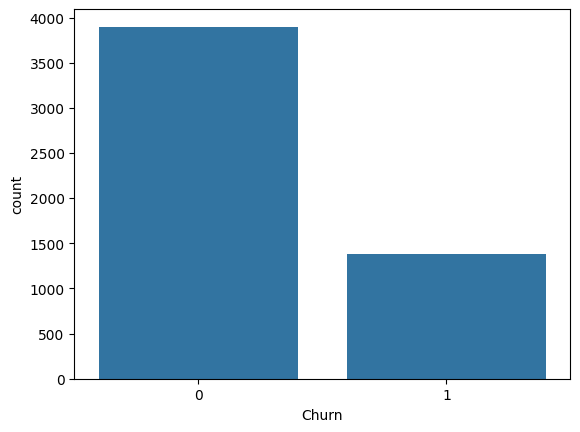

In [21]:
# Анализ целевой переменной
sns.countplot(data, x=target_col)

# Вывод по Target переменной
Как мы видим у нас наблюдается небольшой дисбаланс в классах, приблизительно 30% значений класса 1 и 70% класса 0. 

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [23]:
cat_cols = cat_cols + ['Popular_spent', 'Spent_99_procentile']

In [24]:
feature_cols = num_cols + cat_cols

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), num_cols),     # Нормализация числовых признаков
        ('categorical', OneHotEncoder(), cat_cols)    # OneHotEncoding для категориальных признаков
    ])

In [26]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                      # Предварительная обработка данных
    ('classifier', LogisticRegression())                 # Модель логистической регрессии
])

In [27]:
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],     # Регуляризация
    'classifier__solver': ['liblinear', 'lbfgs']         # Разные алгоритмы решения
}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=42)

In [29]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc')

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod',
                                                                          'Popular_spent',
                                                                          'Spent_99_procentile'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [31]:
print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'classifier__C': 10, 'classifier__solver': 'liblinear'}


In [35]:
print(f'Точность на тестовых данных: {roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])}')

Точность на тестовых данных: 0.8283170639355011


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [40]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score


catboost_model = CatBoostClassifier(silent=True,
                                    cat_features=cat_cols)

catboost_model.fit(X_train, y_train)

In [41]:
# Оценка на тестовых данных
y_test_predicted = catboost_model.predict_proba(X_test)[:, 1]
print(f'Точность на тестовых данных: {roc_auc_score(y_test, y_test_predicted)}')

Точность на тестовых данных: 0.825534950730045


# Краткий вывод по базовой модели Catboost.

Самая базовая модель, без какого-либо подбора параметров дает значение по метрике roc_auc = 0.83, что примерно равно тому же самому, что и для модели logistic regression. Ниже, попробуем повысить качество нашей модель, используя подбор оптимальных метрик.

In [50]:
greed_srch_catboost_model = CatBoostClassifier(
                                    silent=True,
                                    cat_features=cat_cols)

param_grid = {'l2_leaf_reg': [1, 4, 8],
              'learning_rate': [0.01, 0.1, 0.5],
              'depth': [2, 6, 10],
              'n_estimators': [300, 500, 800]}


grid_search = GridSearchCV(estimator=greed_srch_catboost_model, 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=3)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x16dc69090>,
             param_grid={'depth': [2, 6, 10], 'l2_leaf_reg': [1, 4, 8],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [300, 500, 800]},
             scoring='roc_auc')

In [51]:
print(f"Best n_estimators: {grid_search.best_params_}")

Best n_estimators: {'depth': 2, 'l2_leaf_reg': 8, 'learning_rate': 0.1, 'n_estimators': 300}


In [54]:
# Fit Catboost using best params
best_catboost = CatBoostClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                    silent=True,
                                    cat_features=cat_cols,
                                    l2_leaf_reg=grid_search.best_params_['l2_leaf_reg'],
                                  learning_rate=grid_search.best_params_['learning_rate'],
                                  depth=grid_search.best_params_['depth'])
best_catboost.fit(X_train, y_train)

In [55]:
# Оценка на тестовых данных
y_test_predicted_greed = best_catboost.predict_proba(X_test)[:, 1]

cat_boost_roc_auc_greed = roc_auc_score(y_test, y_test_predicted_greed)
print(f'Точность на тестовых данных: {cat_boost_roc_auc_greed}')

Точность на тестовых данных: 0.8276682889888347


# Итоговое качество на Train выборке

Лучшее качество по метрике ROC_AUC на TRAIN выборке было достигнуто 0.827

Были найдены следующие значения, которые показали наилучшее значение для  модели:

depth: 2, 
l2_leaf_reg: 8, 
learning_rate: 0.1, 
n_estimators: 300

# Предсказания

In [56]:
# Загрузим данные и сделаем предобработку для них
df_to_validate = pd.read_csv('./test.csv')

df_to_validate["TotalSpent"] = df_to_validate["TotalSpent"].apply(lambda x: float(x) if x!= ' ' else median_total_spent)
df_to_validate["Popular_spent"] = df_to_validate["TotalSpent"].apply(lambda x: True if x < 453 else False)
df_to_validate["Spent_99_procentile"] = df_to_validate["TotalSpent"].apply(lambda x: True if x >= procentile_99 else False)

In [59]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_catboost.predict_proba(df_to_validate)[:, 1] # используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv', index=False)

# Финальная метрика на Stepic

0.853